## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow

Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime 
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_flights_sample.csv', delimiter=',', low_memory=False)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-10-26,UA,WN,WN,4052,EV,N8541W,2542,12954,LGB,...,1.0,528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,1.0,404.0,NaN,NaN,18.0,0.0,0.0,NaN,NaN,NaN
2,2019-02-06,WN,NK,NK,5531,OO,N367CA,6266,10868,CAE,...,1.0,93.0,40.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,2019-11-11,DL,DL,DL,629,B6,N907WN,4607,14869,SLC,...,1.0,315.0,NaN,NaN,20.0,0.0,NaN,NaN,NaN,NaN
4,2019-03-25,WN,WN,WN,296,HA,N434YX,4535,14771,SFO,...,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              600000 non-null  object 
 1   mkt_unique_carrier   600000 non-null  object 
 2   branded_code_share   600000 non-null  object 
 3   mkt_carrier          600000 non-null  object 
 4   mkt_carrier_fl_num   600000 non-null  int64  
 5   op_unique_carrier    600000 non-null  object 
 6   tail_num             600000 non-null  object 
 7   op_carrier_fl_num    600000 non-null  int64  
 8   origin_airport_id    600000 non-null  int64  
 9   origin               600000 non-null  object 
 10  origin_city_name     600000 non-null  object 
 11  dest_airport_id      600000 non-null  int64  
 12  dest                 600000 non-null  object 
 13  dest_city_name       600000 non-null  object 
 14  crs_dep_time         600000 non-null  int64  
 15  dep_time         

In [4]:
#Convert fl_date to a date
import time
import datetime
flights['fl_date'] = pd.to_datetime(flights['fl_date']).dt.strftime('%Y-%m-%d')

In [5]:
# Get top 10 airports by weather delay count
top10 = flights[['origin', 'weather_delay']].dropna()
top10 = top10.groupby('origin')['weather_delay'].count().sort_values(ascending=False)
top10.head(10)

origin
ORD    5646
ATL    5569
DFW    4138
DEN    3873
LAX    3587
CLT    3582
SEA    2744
SFO    2553
PHX    2533
LGA    2468
Name: weather_delay, dtype: int64

In [ ]:
#Get Weather Data from World Weather API
from wwo_hist import retrieve_hist_data
frequency=12
start_date = '01-JAN-2018'
end_date = '31-DEC-2019'
api_key = 'd385b2b23e2c4b2392535423211101'
location_list = ['ORD', 'ATL', 'DFW', 'DEN', 'LAX', 'CLT', 'SEA', 'SFO', 'PHX', 'LGA']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)

In [6]:
# Import weather data for top 10 airports with weather delays by count
import pandas as pd
import glob

path = r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Weather'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

weather = pd.concat(li, axis=0, ignore_index=True)

In [7]:
#Convert to date and filter table
weather['date_time'] = pd.to_datetime(weather['date_time']).dt.date
weather = weather.filter(['date_time', 'location', 'totalSnow_cm', 'sunHour', 'cloudcover', 'precipMM'])

In [8]:
# Convert date column to date
weather['date_time'] = pd.to_datetime(weather['date_time']).dt.strftime('%Y-%m-%d')

In [9]:
# Add weather type to table
weather_type = []
for row in range(len(weather)):
    if weather.iloc[row]['totalSnow_cm'] > 0:
        weather_type.append('Snowy')
    elif weather.iloc[row]['precipMM'] > 0:
        weather_type.append('Rainy')
    elif weather.iloc[row]['cloudcover'] > 50:
        weather_type.append('Cloudy')
    else:
        weather_type.append('Sunny')
weather['weather_type'] = weather_type

In [10]:
weather.head()

,date_time,location,totalSnow_cm,sunHour,cloudcover,precipMM,weather_type
0,2018-01-01,ATL,0.0,8.7,34,0.0,Sunny
1,2018-01-01,ATL,0.0,8.7,10,0.0,Sunny
2,2018-01-02,ATL,0.0,8.7,11,0.0,Sunny
3,2018-01-02,ATL,0.0,8.7,15,0.0,Sunny
4,2018-01-03,ATL,0.0,5.4,100,0.0,Cloudy


In [11]:
#Merge flights and weather tables
flights_weather = pd.merge(flights, weather, how='left', left_on=['fl_date', 'origin'], right_on = ['date_time', 'location'])

In [12]:
flights_weather

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,first_dep_time,total_add_gtime,longest_add_gtime,date_time,location,totalSnow_cm,sunHour,cloudcover,precipMM,weather_type
0,2018-10-26,UA,WN,WN,4052,EV,N8541W,2542,12954,LGB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,NaN,NaN,NaN,2018-03-26,ORD,0.0,12.7,0.0,0.0,Sunny
2,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,NaN,NaN,NaN,2018-03-26,ORD,0.0,12.7,10.0,0.0,Sunny
3,2019-02-06,WN,NK,NK,5531,OO,N367CA,6266,10868,CAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-11,DL,DL,DL,629,B6,N907WN,4607,14869,SLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781245,2019-04-24,AA,AS,AS,3827,WN,N562JB,181,14893,SMF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781246,2018-09-03,WN,AA_CODESHARE,AA,1570,AA,N7863A,4858,12278,ICT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781247,2018-04-18,AS,UA,UA,5390,9E,N509JB,494,14100,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781248,2019-05-19,HA,AA_CODESHARE,AA,5494,OH,N669AW,1643,14747,SEA,...,NaN,NaN,NaN,2019-05-19,SEA,0.0,11.5,66.0,0.1,Rainy


In [13]:
#Weather flights summary table, drop nan
summary = flights_weather[['weather_type', 'dep_delay']].dropna()

[(-500.0, 500.0)]

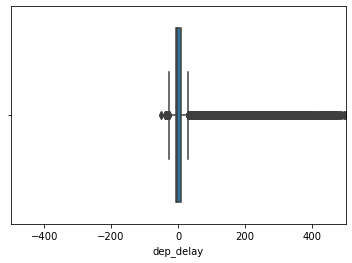

In [14]:
# Box Plot
ax = sns.boxplot(x=summary['dep_delay'])
ax.set(xlim=(-500, 500))

In [15]:
# Remove high outliers
summary = summary[(summary['dep_delay']) < 200]

In [16]:
# Summary Table
summary.groupby('weather_type').mean().reset_index()

,weather_type,dep_delay
0,Cloudy,7.639058
1,Rainy,7.185312
2,Snowy,8.139227
3,Sunny,7.281595


#### Weather vs. delay
- Yes, the weather appears to impact the delay 
- In general, sunny days have a lower mean delay
- Snowy and cloudy have a higher mean delay
- Rainy is about the same which suggest that the Rain_mm>0 logic may be too harsh
- There are likely some nice days that have a little bit of rain

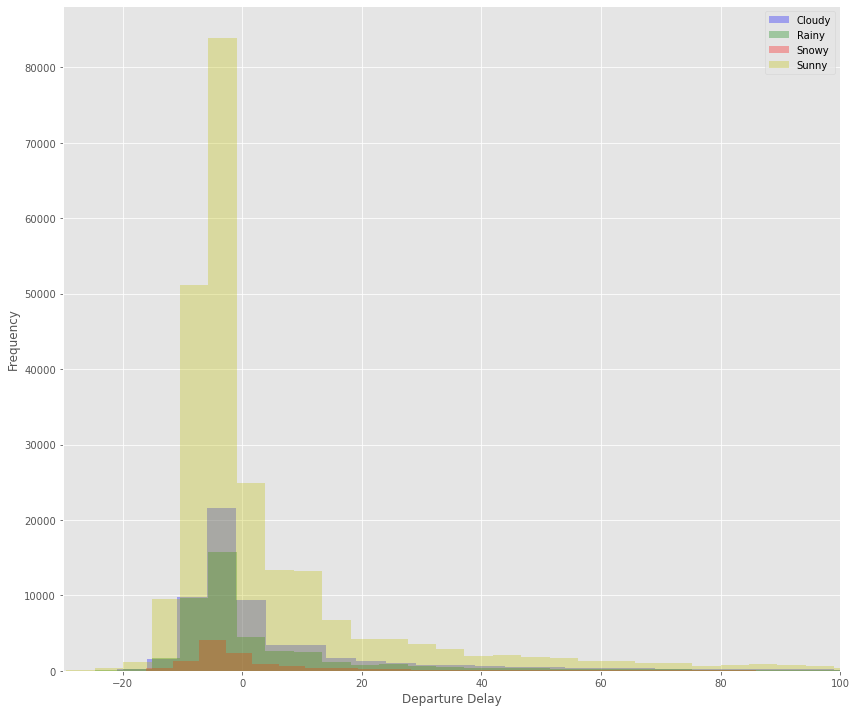

In [19]:
#Plots histograms
Cloudy = summary[summary['weather_type'] == 'Cloudy']
Rainy = summary[summary['weather_type'] == 'Rainy']
Snowy = summary[summary['weather_type'] == 'Snowy']
Sunny = summary[summary['weather_type'] == 'Sunny']

plt.style.use('ggplot')
plt.figure(figsize=(12,10))
bins = 50
plt.hist(Cloudy['dep_delay'], bins, alpha=0.3, label='Cloudy', color='b')
plt.hist(Rainy['dep_delay'], bins, alpha=0.3, label='Rainy', color = 'g')
plt.hist(Snowy['dep_delay'], bins, alpha=0.3, label='Snowy', color = 'r')
plt.hist(Sunny['dep_delay'], bins, alpha=0.3, label='Sunny', color = 'y')
plt.legend(loc='upper right')
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.xlim(-30,100)
plt.tight_layout()
plt.show()

In [20]:
#The Kolmogorov-Smirnov test can be used to test whether two underlying one-dimensional probability distributions differ. 
#The null hypothesis is that both samples come from the same distribution
from scipy.stats import ks_2samp

def hypothesis(p):
    if p < 0.05:
        print("Null hypothesis rejected --> distributions are different", '\n')
    else:
        print("Fail to reject null hypothesis --> distributions are the same", '\n')
        
s1, p1 = ks_2samp(Cloudy['dep_delay'], Rainy['dep_delay'])
s2, p2 = ks_2samp(Cloudy['dep_delay'], Snowy['dep_delay'])
s3, p3 = ks_2samp(Cloudy['dep_delay'], Sunny['dep_delay'])
s4, p4 = ks_2samp(Rainy['dep_delay'], Snowy['dep_delay'])
s5, p5 = ks_2samp(Rainy['dep_delay'], Sunny['dep_delay'])
s6, p6 = ks_2samp(Snowy['dep_delay'], Sunny['dep_delay'])

print('Cloudy vs. Rainy:', ks_2samp(Cloudy['dep_delay'], Rainy['dep_delay']))
hypothesis(p1)
print('Cloudy vs. Snowy:', ks_2samp(Cloudy['dep_delay'], Snowy['dep_delay']))
hypothesis(p2)
print('Cloudy vs. Sunny:', ks_2samp(Cloudy['dep_delay'], Sunny['dep_delay']))
hypothesis(p3)
print('Rainy vs. Snowy:', ks_2samp(Rainy['dep_delay'], Snowy['dep_delay']))
hypothesis(p4)
print('Rainy vs. Sunny:', ks_2samp(Rainy['dep_delay'], Sunny['dep_delay']))
hypothesis(p5)
print('Snowy vs. Sunny:', ks_2samp(Snowy['dep_delay'], Sunny['dep_delay']))
hypothesis(p6)

Cloudy vs. Rainy: KstestResult(statistic=0.008441280749286295, pvalue=0.0499657454649014)
Null hypothesis rejected --> distributions are different 

Cloudy vs. Snowy: KstestResult(statistic=0.019725354388412164, pvalue=0.0006452402431901569)
Null hypothesis rejected --> distributions are different 

Cloudy vs. Sunny: KstestResult(statistic=0.007982527246684024, pvalue=0.004108067861145855)
Null hypothesis rejected --> distributions are different 

Rainy vs. Snowy: KstestResult(statistic=0.025014714161045393, pvalue=1.00491013040109e-05)
Null hypothesis rejected --> distributions are different 

Rainy vs. Sunny: KstestResult(statistic=0.0022666904824149015, pvalue=0.9896671239825288)
Fail to reject null hypothesis --> distributions are the same 

Snowy vs. Sunny: KstestResult(statistic=0.024219957317325735, pvalue=1.8809944477033634e-06)
Null hypothesis rejected --> distributions are different 



### Kolmogorov-Smirnov Test
- Test indicates that the weather types come from different distributions, except for Sunny and Rainy.
- This may be due to the Rain_mm>0 logic used for rain being too harsh.
- There are likely nice days with only some rain.